In [3]:
%matplotlib inline

import sys
import os
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt, animation, rc
from datetime import datetime, timedelta
from dateutil.parser import parse
from cartopy import crs, feature
import cmocean

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/notebooks/parcels')
from OP_functions_beaching import *

In [3]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)

Load deploying sites with uniform distribution

In [4]:
#batt=xr.open_dataset(paths['mask'],decode_times=False)
#coord=xr.open_dataset(paths['coords'],decode_times=False)
#clat,clon = p_unidist(coord.gphif[0,:,:],coord.glamf[0,:,:],batt.mbathy[0,:,:],10,10)

with open('clat.txt') as f:
    clat = f.read()
    clat= clat[1:-1]
    clat0 = clat.split(",")
    f.close()
with open('clon.txt') as f:
    clon = f.read()
    clon=clon[1:-1]
    clon0 = clon.split(",")
    f.close()
    
clat,clon=[],[]
for i in range(len(clat0)):
    clat.append(float(clat0[i]))
    clon.append(float(clon0[i]))

## THIS MUST BE THE SAME USED WHEN RUNNING PARCELS

In [4]:
start = datetime(2018, 10, 1) #Start date
# Set Time length [days] and timestep [seconds]
length = 5
duration = timedelta(days=length)
dt = 90 #toggle between - or + to pick backwards or forwards
N = len(clat) # number of deploying locations
n = 1 # 1000   # number of particles per location
dmin = list(np.zeros(len(clat))) #minimum depth
dd = 5 #max depth difference from dmin
x_offset, y_offset, zvals = p_deploy(N,n,dmin,dd)

In [5]:
# Set output file name.  Maybe change for each run
fn = 'Beaching-Unbeaching3' + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

In [6]:
lon = np.zeros([N,n])
lat = np.zeros([N,n])

for i in range(N):
    lon[i,:]=(clon[i] + x_offset[i,:])
    lat[i,:]=(clat[i] + y_offset[i,:])
z = zvals

In [7]:
mask = xr.open_dataset(paths['mask'])
ds = xr.open_dataset(outfile)
coord=xr.open_dataset(paths['coords'],decode_times=False)

In [8]:
dt=[]
for i in range(len(clat)):
    sedi = np.where(ds.beached[i,:]==1)
    if len(sedi[0])>1:
        dt.append((sedi[0][0]))

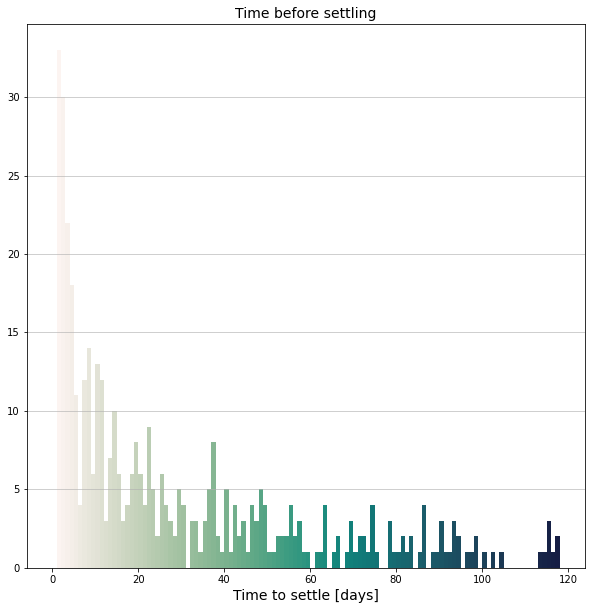

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
fs=14
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs 
from matplotlib.ticker import PercentFormatter
dist=np.arange(0,np.max(dt),1)
n, bins, patches=plt.hist(dt,dist)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Time to settle [days]',fontsize=fs)
plt.title('Time before settling',fontsize=fs)

cm = cmocean.cm.tempo
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]\n",
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))


In [1]:
visual(outfile,N,n,clon,clat,dmin,dd,-1,-1,local)

NameError: name 'visual' is not defined

No handles with labels found to put in legend.


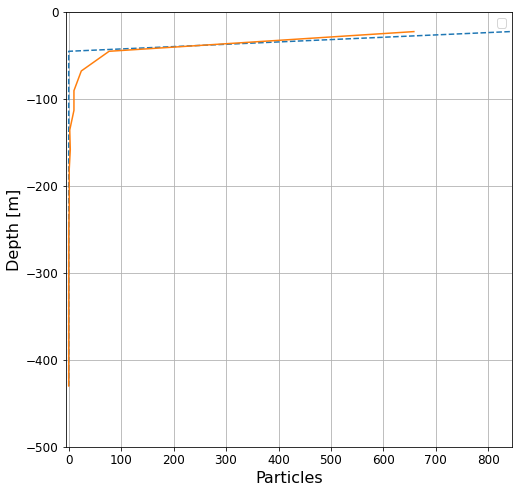

In [11]:
profile(N,n,length,outfile,local)

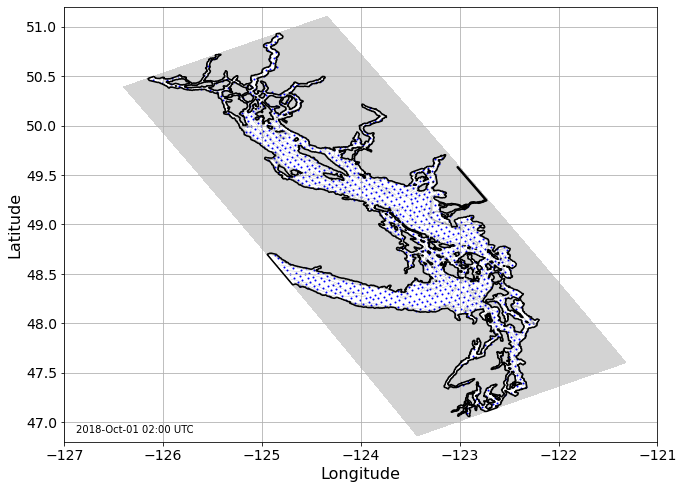

In [14]:
fps=3
anim = mapanimation(outfile,N,n,clon,clat,fps,local)
f = r"/home/jvalenti/MOAD/animations/PETstokes.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f, writer = FFwriter)

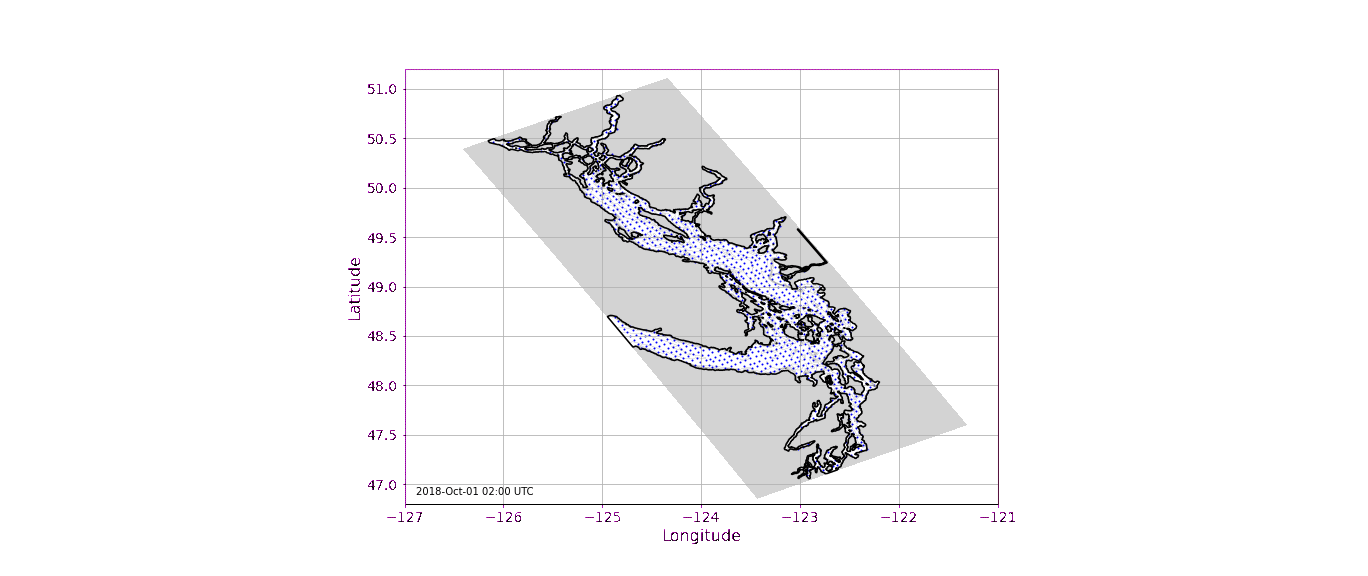

In [ ]:
with open(f,'rb') as anim:
     display(Image(anim.read()))